In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt # Corrected the typo here: puplot to pyplot
import numpy as np

In [ ]:
(x_train, y_train),(x_test,y_test) =datasets.cifar10.load_data()
y_train[0]

array([6], dtype=uint8)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
def plot_sample (x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(class_names[y[index]])

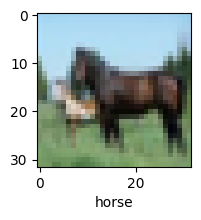

In [ ]:
plot_sample(x_train,y_train,12)

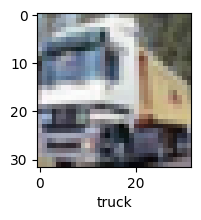

In [ ]:
plot_sample(x_train,y_train,1)

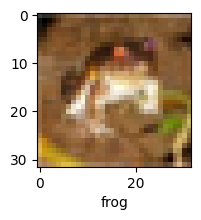

In [ ]:
plot_sample(x_train,y_train,0)

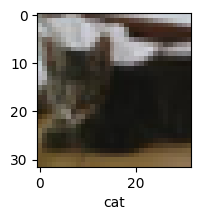

In [ ]:
plot_sample(x_train,y_train,9)

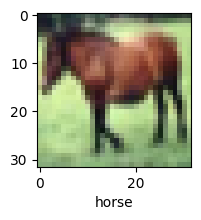

In [ ]:
plot_sample(x_train,y_train,7)

In [ ]:
x_train =x_train/255.0
x_test  = x_test/255.0

In [ ]:
ann = models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),  # Change to tf.keras.layers.Flatten
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Compile the model before training
ann.compile(optimizer='adam', # You can choose other optimizers like 'sgd', 'rmsprop', etc.
              loss='sparse_categorical_crossentropy', # Use 'categorical_crossentropy' if y_train is one-hot encoded
              metrics=['accuracy']) # You can add other metrics like 'precision', 'recall', etc.
ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 307s 195ms/step - accuracy: 0.2792 - loss: 2.1979
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 344s 209ms/step - accuracy: 0.3995 - loss: 1.6728
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 384s 211ms/step - accuracy: 0.4298 - loss: 1.5871
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 365s 200ms/step - accuracy: 0.4447 - loss: 1.5457
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 316s 202ms/step - accuracy: 0.4639 - loss: 1.4922


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.68      0.51      1000
           1       0.62      0.51      0.56      1000
           2       0.46      0.14      0.22      1000
           3       0.30      0.32      0.31      1000
           4       0.45      0.36      0.40      1000
           5       0.39      0.31      0.34      1000
           6       0.52      0.47      0.49      1000
           7       0.52      0.52      0.52      1000
           8       0.55      0.60      0.57      1000
           9       0.42      0.66      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.44     10000
weighted avg       0.46      0.46      0.44     10000

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.68      0.51      1000
           1       0.62      0.51      

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics =['accuracy']
              )

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3832 - loss: 1.6905
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.5956 - loss: 1.1507
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.6586 - loss: 0.9799
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.6904 - loss: 0.8843
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.7175 - loss: 0.8079
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7405 - loss: 0.7451
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7637 - loss: 0.6748
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7749 - loss: 0.6441
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7942 - loss: 0.5854
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.8072 - loss: 0.5550


In [ ]:
# prompt: do predecrtion

import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      1000
           1       0.86      0.80      0.83      1000
           2       0.62      0.57      0.59      1000
           3       0.53      0.53      0.53      1000
           4       0.73      0.49      0.59      1000
           5       0.55      0.68      0.61      1000
           6       0.81      0.73      0.77      1000
           7       0.68      0.80      0.73      1000
           8       0.79      0.83      0.81      1000
           9       0.81      0.77      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



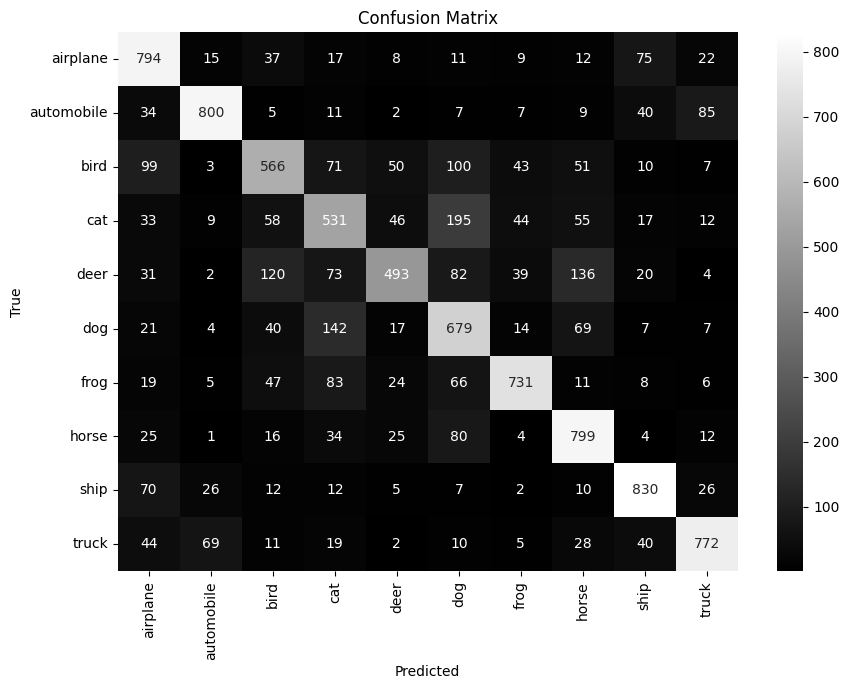

In [ ]:
# prompt: do confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_classes are defined from previous code

conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='grey',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7026 - loss: 0.9204


[0.9274070262908936, 0.6995000243186951]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


array([[1.5333357e-04, 1.5655736e-05, 7.8414334e-04, 8.0403405e-01,
        5.8394618e-04, 1.8798342e-01, 6.2381183e-03, 1.0624784e-04,
        8.9945657e-05, 1.1192247e-05],
       [5.3187844e-04, 7.8468462e-03, 3.8720147e-09, 1.7216824e-10,
        8.5599156e-10, 6.1245439e-11, 7.8565704e-12, 1.4426913e-09,
        9.9094391e-01, 6.7733898e-04],
       [1.0030180e-01, 5.0178196e-02, 1.1264161e-03, 5.5801594e-03,
        2.2736336e-03, 3.4171767e-03, 7.8871337e-05, 1.4120019e-02,
        7.8440326e-01, 3.8520437e-02],
       [9.1301221e-01, 1.0470961e-04, 7.3426492e-03, 1.7989517e-04,
        2.5721653e-03, 3.8756211e-06, 4.0980340e-06, 4.4350239e-05,
        7.6728448e-02, 7.4348891e-06],
       [1.1195946e-05, 1.0190049e-05, 1.0191282e-01, 9.6446663e-02,
        2.9564553e-01, 4.3596602e-03, 5.0158668e-01, 6.4815458e-06,
        2.0753865e-05, 3.8475310e-08]], dtype=float32)